# Quickstart Guide

Congratulations on successfully installing Sequenzo! 🎉 You're now ready to explore social sequence analysis with ease.

In this guide, we'll walk you through analyzing country-level CO₂ emissions sequences step by step. If you're curious about how we transformed the original dataset into a format suitable for sequence analysis, you can find the detailed explanation here (TODO: webpage on SequenzoWebsite).

New to Python? No worries! We've designed Sequenzo to be intuitive and beginner-friendly, so you can jump right in regardless of whether you are a newbie or a seasoned Python coder. 

By the end of this tutorial, you'll learn how to:

1. Install Sequenzo
2. Load and explore a dataset
3. Analyze social sequences
4. Visualize the results

Now, let's get started on this exciting journey! 🐍✨


## 1. Get a rough idea of the data

In [3]:
# Import necessary libraries
# Your calling code (e.g., in a script or notebook)

# from sequenzo import * # Import the package, give it a short alias
import pandas as pd # Data manipulation

from sequenzo import helpers
# List all the available datasets in Sequenzo
# Now access functions using the alias:
# print('Available datasets in Sequenzo: ', list_datasets())

# Load the data that we would like to explore in this tutorial
# `df` is the short for `dataframe`, which is a common variable name for a dataset
# df = load_dataset('country_co2_emissions')
# df = load_dataset('country_co2_emissions_global_deciles')
df = pd.read_csv("D:/country_co2_emissions_missing.csv")
a = helpers.assign_unique_ids(df)

# Show the dataframe
df

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Afghanistan,Very Low,Very Low,Very Low,Very Low,Very Low,Very Low,Very Low,Very Low,Very Low,...,High,High,High,High,High,High,High,High,High,High
1,Albania,Very Low,Very Low,Very Low,Very Low,Very Low,Very Low,Very Low,Very Low,Very Low,...,Very High,Very High,Very High,Very High,Very High,Very High,Very High,Very High,Very High,Very High
2,Algeria,Very Low,Very Low,Very Low,Very Low,Very Low,Very Low,Very Low,Very Low,Very Low,...,Very High,Very High,Very High,Very High,Very High,Very High,Very High,Very High,Very High,Very High
3,Andorra,High,High,High,High,High,High,High,High,High,...,Very High,Very High,Very High,Very High,Very High,Very High,Very High,Very High,Very High,Very High
4,Angola,Low,Low,Low,Low,Low,Low,Low,Low,Low,...,High,High,High,High,High,High,High,High,High,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,Venezuela,Very Low,Very Low,Very Low,Very Low,Very Low,Very Low,Very Low,Very Low,Very Low,...,Very High,Very High,Very High,Very High,Very High,High,Middle,High,High,High
190,Vietnam,Low,Low,Low,Low,Low,Low,Low,Low,Low,...,High,High,High,High,High,Very High,Very High,Very High,Very High,Very High
191,Yemen,Very Low,Very Low,Very Low,Very Low,Very Low,Very Low,Very Low,Very Low,Very Low,...,High,High,High,High,High,High,High,High,High,High
192,Zambia,High,High,High,High,High,High,High,High,High,...,High,High,High,High,High,High,High,High,High,High


The classification is based on all years' CO₂ per capita values:

* Very Low (Bottom 20%)
* Low (20-40%)
* Middle (40-60%)
* High (60-80%)
* Very High (Top 20%)

Using a jorgan in social sequence analysis, each category is called a **state**, and the sequence of states is called a social sequence. In sum, the dataset shows the level of the CO₂ emissions per capita of each country in each year. 

If we take Andorra as an example:  

In [3]:
# Filter the data for Andorra
andorra_df = df[df['country'] == 'Andorra']

# Show the Andorra df
andorra_df

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
3,Andorra,D7,D7,D7,D7,D7,D7,D7,D7,D7,...,D10 (Very High),D10 (Very High),D10 (Very High),D10 (Very High),D10 (Very High),D10 (Very High),D10 (Very High),D10 (Very High),D10 (Very High),D10 (Very High)


Based on the outcome, which is a subset of the original dataset, we can see that Andorra's CO₂ emissions per capita have undergone the following changes over the years:

* 1990-1991: Started at "Very High" levels, indicating emissions in the top 20% of all countries
* 1992-1997: Dropped to "High" level (60-80th percentile)
* 1998: Brief return to "Very High" level
* 2000s onwards: Stabilized at "High" level (60-80th percentile) and maintained this classification through 2019

But it comes with a question: What if we want to analyze the sequences of all countries? 🤔 

Here we need Sequenzo to help us!

## 2. Analyze Social Sequences with Sequenzo

In [2]:
# Create a SequenceData object

# Define the time-span variable
time_list = list(df.columns)[1:]

# states = ['Very Low', 'Low', 'Middle', 'High', 'Very High']
states = ['D1 (Very Low)', 'D10 (Very High)', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9']

# TODO: write a try and error: if no such a parameter, then ask to pass the right ones
# sequence_data = SequenceData(df, time=time, time_type="year", id_col="country", ids=df['country'].values, states=states)

sequence_data = SequenceData(df, 
                             time=time_list, 
                             time_type="year", 
                             id_col="country", 
                             states=states,
                             labels=states)

sequence_data

[!] Detected missing values (empty cells) in the sequence data.
    → Automatically added 'Missing' to `states` and `labels` for compatibility.
    However, it's strongly recommended to manually include it when defining `states` and `labels`.
    For example:

        states = ['At Home', 'Left Home', 'Missing']
        labels = ['At Home', 'Left Home', 'Missing']

    This ensures consistent color mapping and avoids unexpected visualization errors.

[>] SequenceData initialized successfully! Here's a summary:
[>] Number of sequences: 194
[>] Number of time points: 223
[>] Min/Max sequence length: 216 / 223
[>] There are 7 missing values across 1 sequences.
    First few missing sequence IDs: ['Panama'] ...
[>] Top sequences with the most missing time points:
    (Each row shows a sequence ID and its number of missing values)

             Missing Count
Sequence ID               
Panama                   7
[>] States: ['D1 (Very Low)', 'D10 (Very High)', 'D2', 'D3', 'D4', 'D5', 'D6', '

SequenceData(194 sequences, States: ['D1 (Very Low)', 'D10 (Very High)', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'Missing'])

## Visualization

Among the various visualization methods, the most commonly used one is the **index plot**. Let's see how it works.

Now we have successfully created the `SequenceData` object based on our original dataframe, which is the core object in Sequenzo for analyzing social sequences.

With our naked eyes, we might be only able to see the sequences of one country at a time. However, with the help of Sequenzo, we can analyze all the sequences of countries in one go. The most important tool is **visualization**, which helps us to understand the patterns and trends in the data.

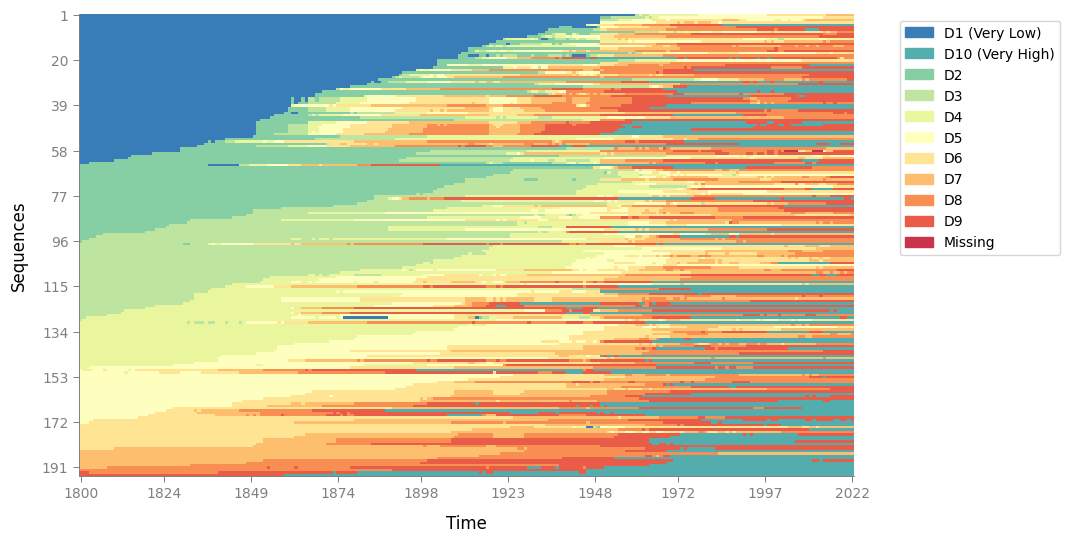

<Figure size 640x480 with 0 Axes>

In [3]:
# Plot the index plot
# TODO: The same for dealing with unexpected parameters here. TypeError: plot_sequence_index() got an unexpected keyword argument 'sortv'

plot_sequence_index(sequence_data, 
                    # save_as='index_plot'
                    )

But what if we would like to know more? state distribution plot. 

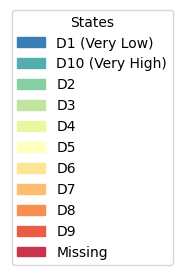

In [4]:
sequence_data.plot_legend()

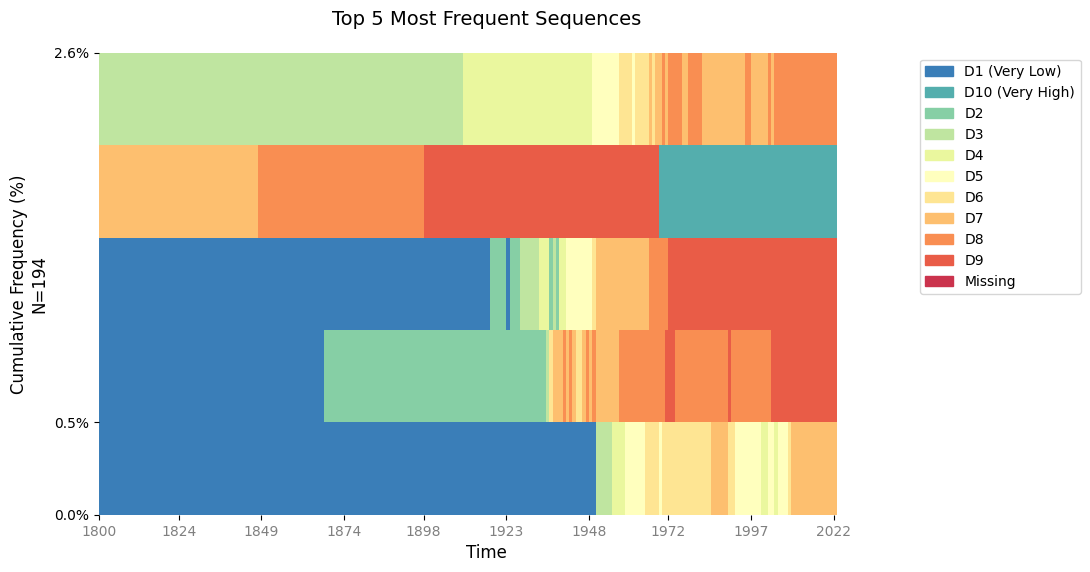

<Figure size 640x480 with 0 Axes>

In [8]:
plot_most_frequent_sequences(sequence_data, top_n=5)

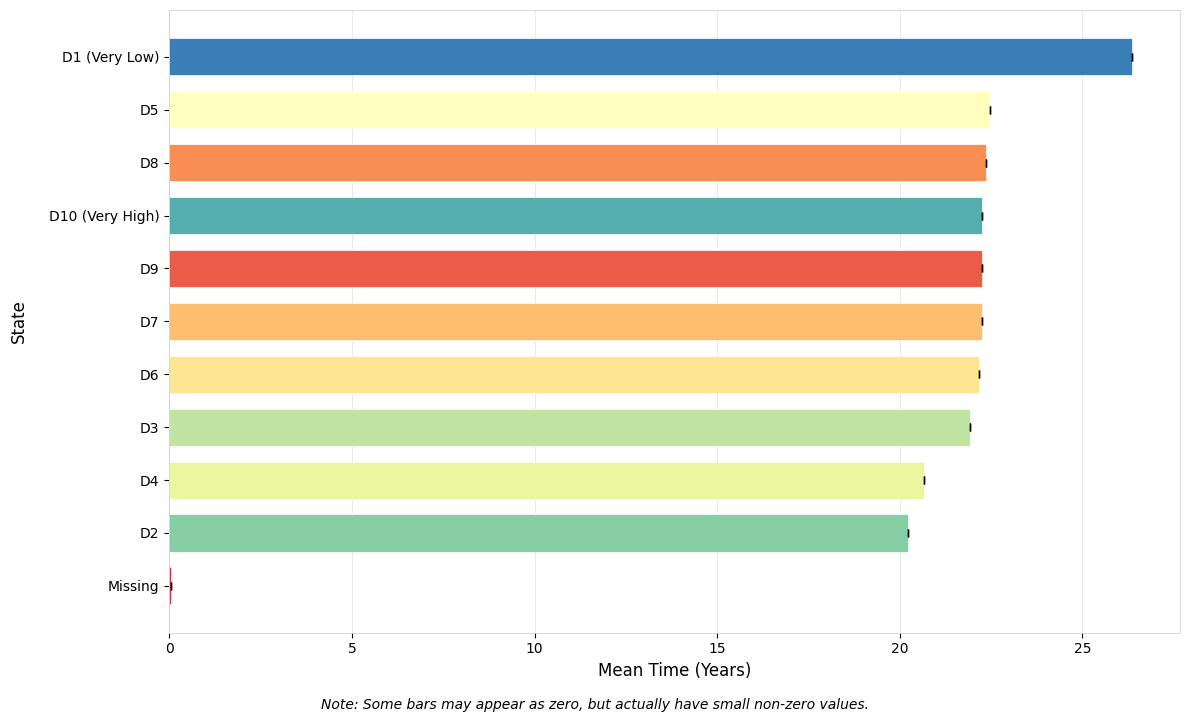

<Figure size 640x480 with 0 Axes>

In [9]:
plot_mean_time(sequence_data)

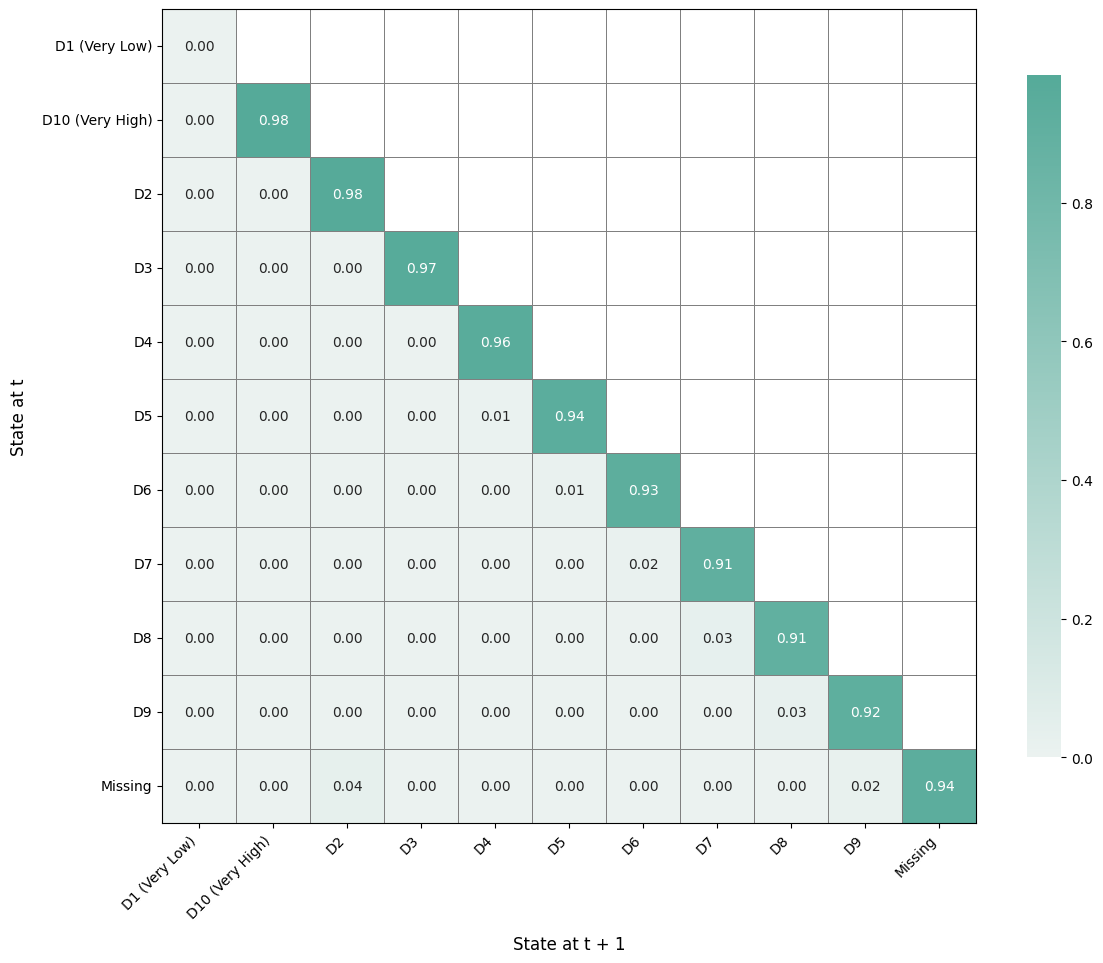

<Figure size 640x480 with 0 Axes>

In [10]:
plot_transition_matrix(sequence_data)


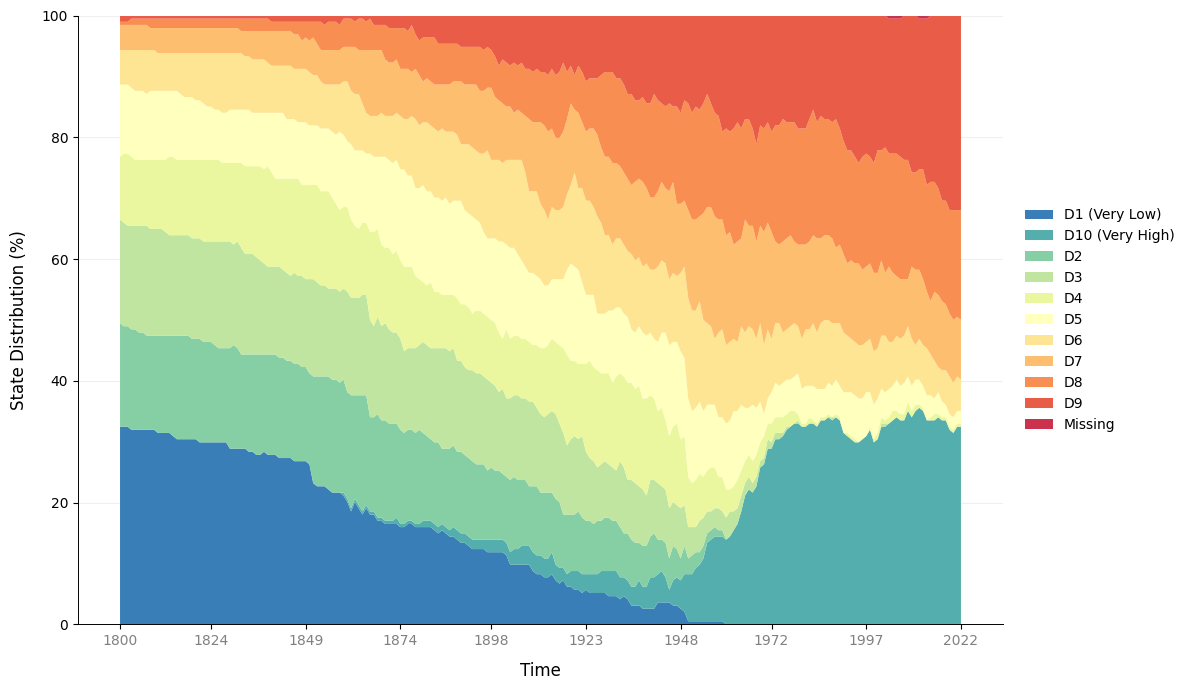

<Figure size 640x480 with 0 Axes>

In [11]:
plot_state_distribution(sequence_data)

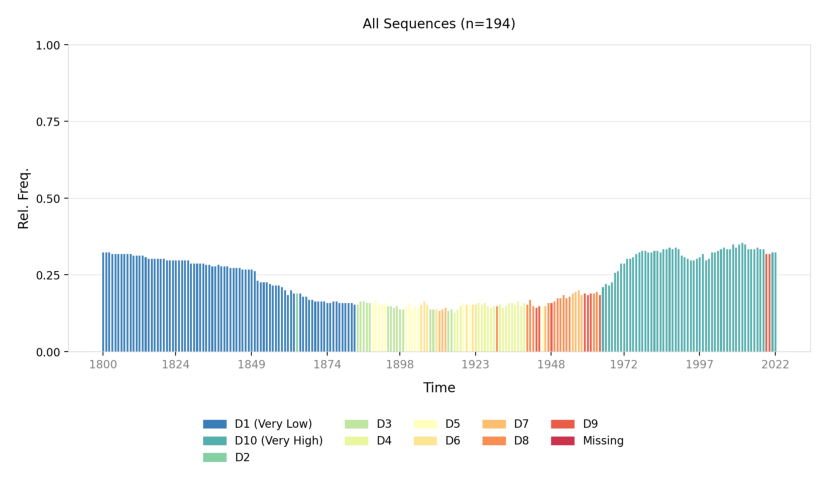

In [12]:
plot_modal_state(sequence_data)

## Dissimilarity Measures

In [13]:
LLCP = get_LCP_length_for_2_seq(sequence_data, sequence_data, 1, 2)
LLCP

68

In [5]:
# You can also replace "OMspell" with "OM/DHD/HAM/LCP" and "TRATE" with "CONSTANT"
om = get_distance_matrix(seqdata=sequence_data,
                         method='OMspell',
                         sm="TRATE",
                         indel="auto")

om

[>] Processing 194 sequences with 11 unique states.
[>] Transition-based substitution-cost matrix (TRATE) initiated...
  - Computing transition probabilities for: [D1 (Very Low), D10 (Very High), D2, D3, D4, D5, D6, D7, D8, D9, Missing]
[>] Indel cost generated.

[>] Identified 194 unique spell sequences.
[>] Starting Optimal Matching with spell(OMspell)...
[>] Computing all pairwise distances...
[>] Computed Successfully.


,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,Uganda,Ukraine,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,Yemen,Zambia,Zimbabwe
Afghanistan,0.000000,153.399402,83.437970,218.000000,192.896791,194.500000,204.000000,124.000000,192.000000,208.803631,...,191.482879,146.500000,208.832310,142.402390,183.300697,111.906038,181.494610,183.797850,211.497207,219.000000
Albania,153.399402,0.000000,125.934541,189.500000,197.420956,195.887820,172.499069,113.497230,182.438925,179.421885,...,161.998160,129.999064,148.364317,120.857354,210.818685,128.282039,193.773795,98.408832,209.911626,178.434541
Algeria,83.437970,125.934541,0.000000,156.500000,197.500000,182.000000,156.500000,100.440598,166.500000,185.500000,...,205.902390,132.000000,171.360583,111.000000,197.923749,82.500000,187.994427,175.396223,207.999069,207.500000
Andorra,218.000000,189.500000,156.500000,0.000000,201.000000,171.500000,77.000000,178.940789,102.000000,130.000000,...,228.399596,160.500000,190.911626,146.500000,204.422579,194.000000,191.500000,185.999069,126.499069,190.940789
Angola,192.896791,197.420956,197.500000,201.000000,0.000000,164.498139,187.000000,172.000000,186.000000,195.831651,...,160.500000,187.500000,127.851039,186.500000,125.495367,214.823347,79.498160,176.994413,200.500000,186.907903
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Venezuela,111.906038,128.282039,82.500000,194.000000,214.823347,177.422579,201.999069,122.846567,182.000000,170.846328,...,216.498160,101.497894,179.780200,99.499064,216.332583,0.000000,215.500000,188.811222,225.402390,195.843989
Vietnam,181.494610,193.773795,187.994427,191.500000,79.498160,173.922818,177.500000,157.500000,170.500000,180.408832,...,149.000000,179.000000,132.497208,176.997207,116.864826,215.500000,0.000000,184.393079,196.000000,185.497208
Yemen,183.797850,98.408832,175.396223,185.999069,176.994413,221.265455,185.996276,170.996276,196.896801,204.995343,...,116.299637,162.497207,159.921888,155.399087,185.332581,188.811222,184.393079,0.000000,176.500000,189.816733
Zambia,211.497207,209.911626,207.999069,126.499069,200.500000,211.911626,147.499069,208.500000,192.499069,208.500000,...,227.803631,208.000000,223.410695,196.000000,183.000000,225.402390,196.000000,176.500000,0.000000,194.500000


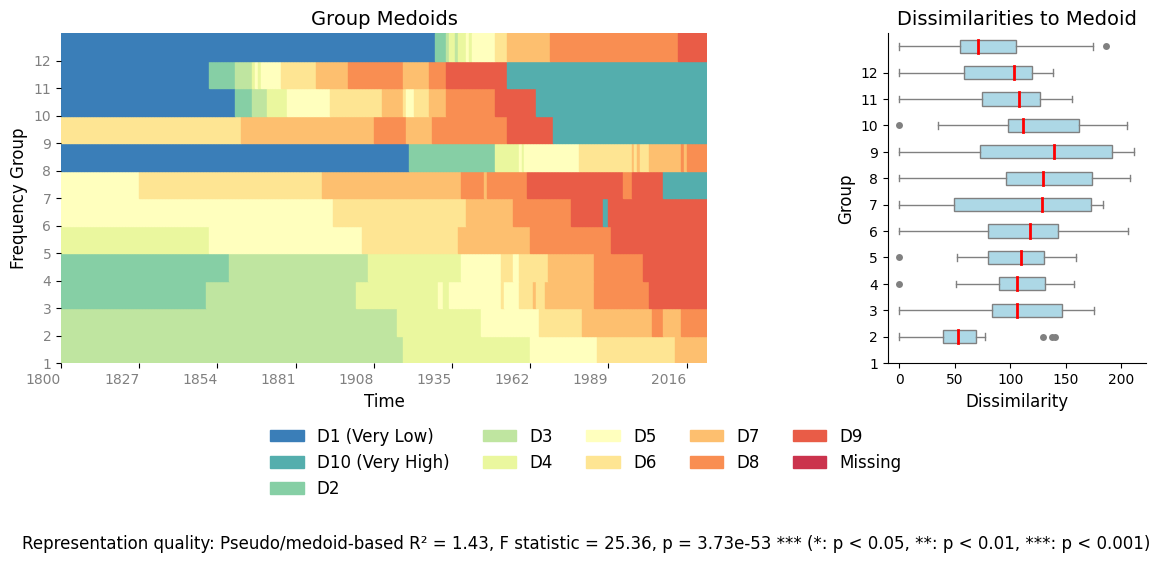

<Figure size 640x480 with 0 Axes>

In [15]:
plot_relative_frequency(seqdata=sequence_data, 
                        distance_matrix=om, 
                        num_groups=12, 
                        dpi=200, 
                        # save_as='relative_frequency_plot'
                        )

## Cluster Analysis

[>] Converting DataFrame to NumPy array...


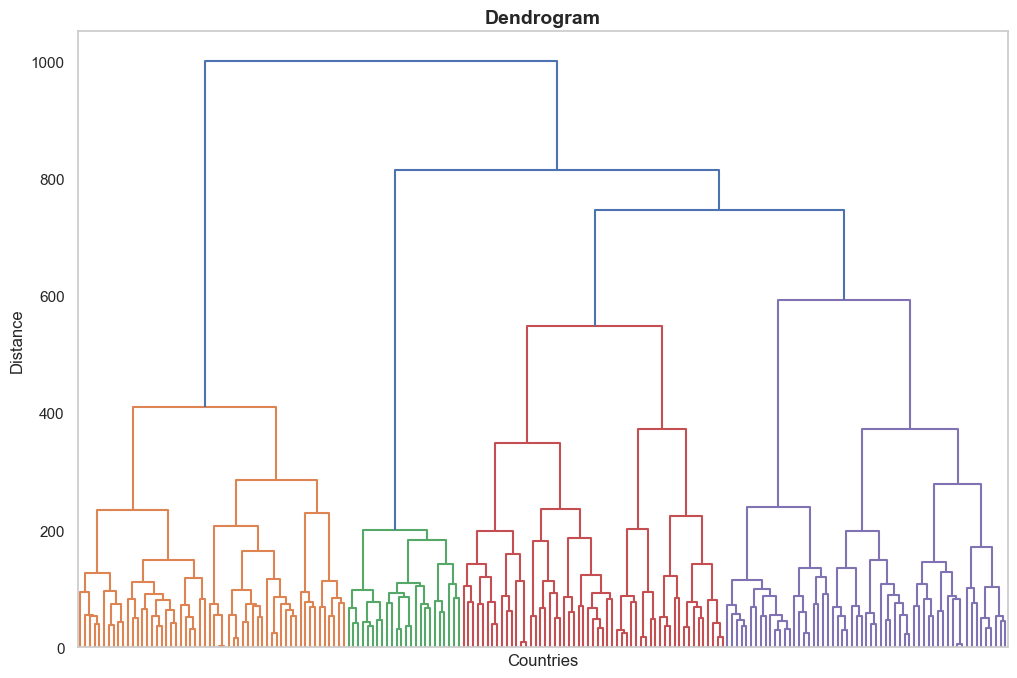

<Figure size 640x480 with 0 Axes>

In [6]:
cluster = Cluster(om, sequence_data.ids, clustering_method='ward')
cluster.plot_dendrogram(xlabel="Countries", ylabel="Distance")


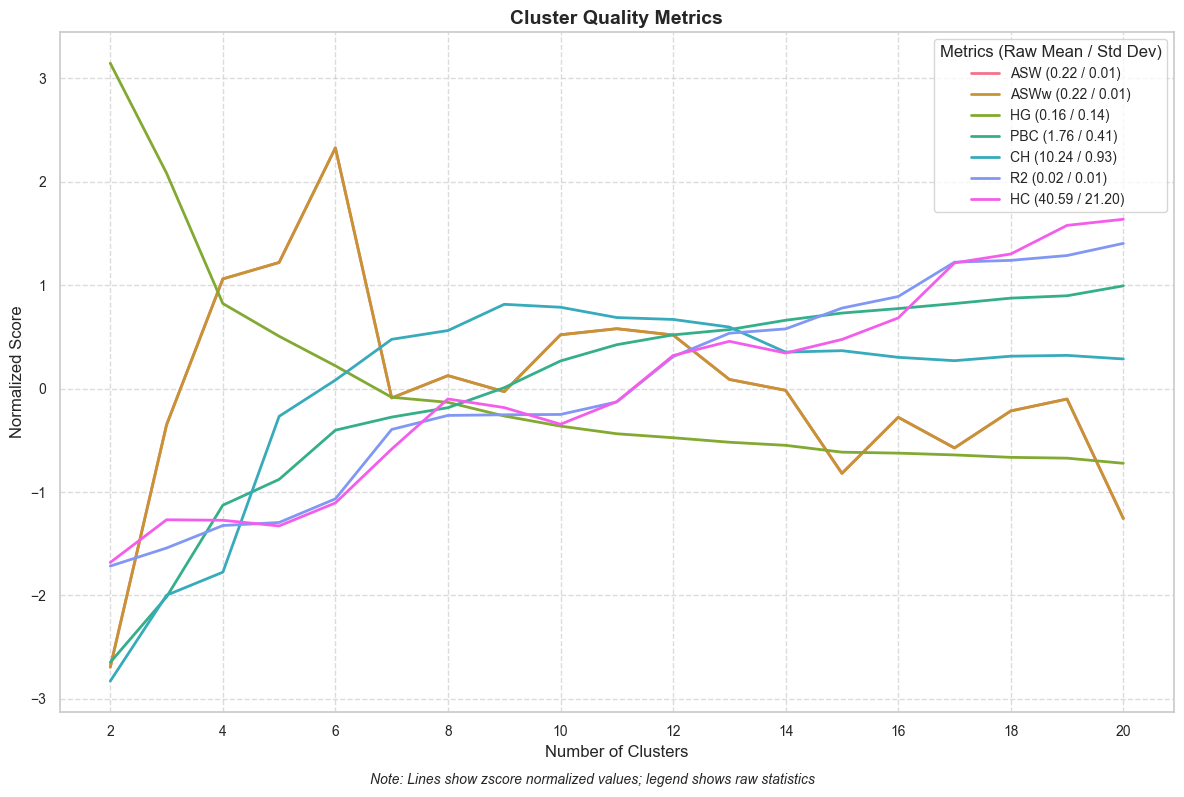

  Metric  Opt. Clusters  Opt. Value  Z-Score Norm.  Min-Max Norm.
0    ASW              6    2.325167       2.325167            1.0
1   ASWw              6    2.325167       2.325167            1.0
2     HG              2    3.143167       3.143167            1.0
3    PBC             20    0.991954       0.991954            1.0
4     CH              9    0.813604       0.813604            1.0
5     R2             20    1.402561       1.402561            1.0
6     HC             20    1.635352       1.635352            1.0


<Figure size 640x480 with 0 Axes>

In [7]:
# Create a ClusterQuality object to evaluate clustering quality
cluster_quality = ClusterQuality(cluster)
cluster_quality.compute_cluster_quality_scores()
cluster_quality.plot_combined_scores(norm='zscore', save_as='combined_scores')
summary_table = cluster_quality.get_metrics_table()
print(summary_table)

       Entity ID  Cluster
0    Afghanistan        1
1        Albania        1
2        Algeria        1
3        Andorra        3
4         Angola        4
..           ...      ...
189    Venezuela        1
190      Vietnam        4
191        Yemen        2
192       Zambia        3
193     Zimbabwe        5

[194 rows x 2 columns]
   Cluster  Count  Percentage
0        1     56       28.87
1        2     24       12.37
2        3     55       28.35
3        4     22       11.34
4        5     37       19.07


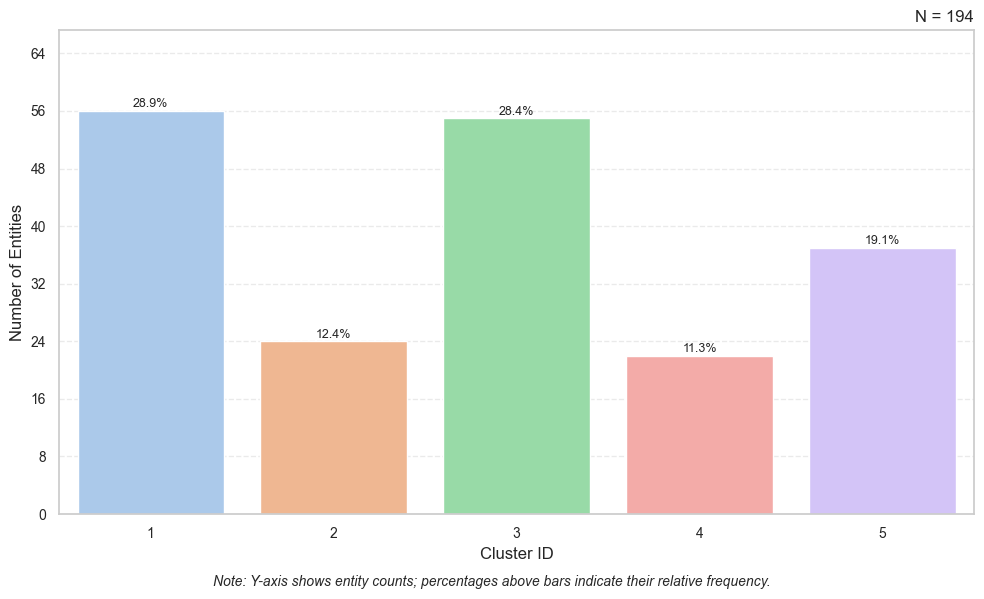

<Figure size 640x480 with 0 Axes>

In [18]:
cluster_results = ClusterResults(cluster)
membership_table = cluster_results.get_cluster_memberships(num_clusters=5)
print(membership_table)
distribution = cluster_results.get_cluster_distribution(num_clusters=5)
print(distribution)
cluster_results.plot_cluster_distribution(num_clusters=5, save_as="distribution.png", title=None)


In [19]:
mapping_dict = {
    1: 'xxx',
    2: 'Test', 
    3: 'The name of the cluster',
    4: 'xxxxx',
    5: 'whsiaa',
}

membership_table = replace_cluster_id_by_labels(membership_table, 
                                                mapping=mapping_dict,
                                                new_cluster_column_name='Cluster',
                                                new_id_column_name='ID')

membership_table

,ID,Cluster
0,Afghanistan,xxx
1,Albania,xxx
2,Algeria,xxx
3,Andorra,The name of the cluster
4,Angola,xxxxx
...,...,...
189,Venezuela,xxx
190,Vietnam,xxxxx
191,Yemen,Test
192,Zambia,The name of the cluster


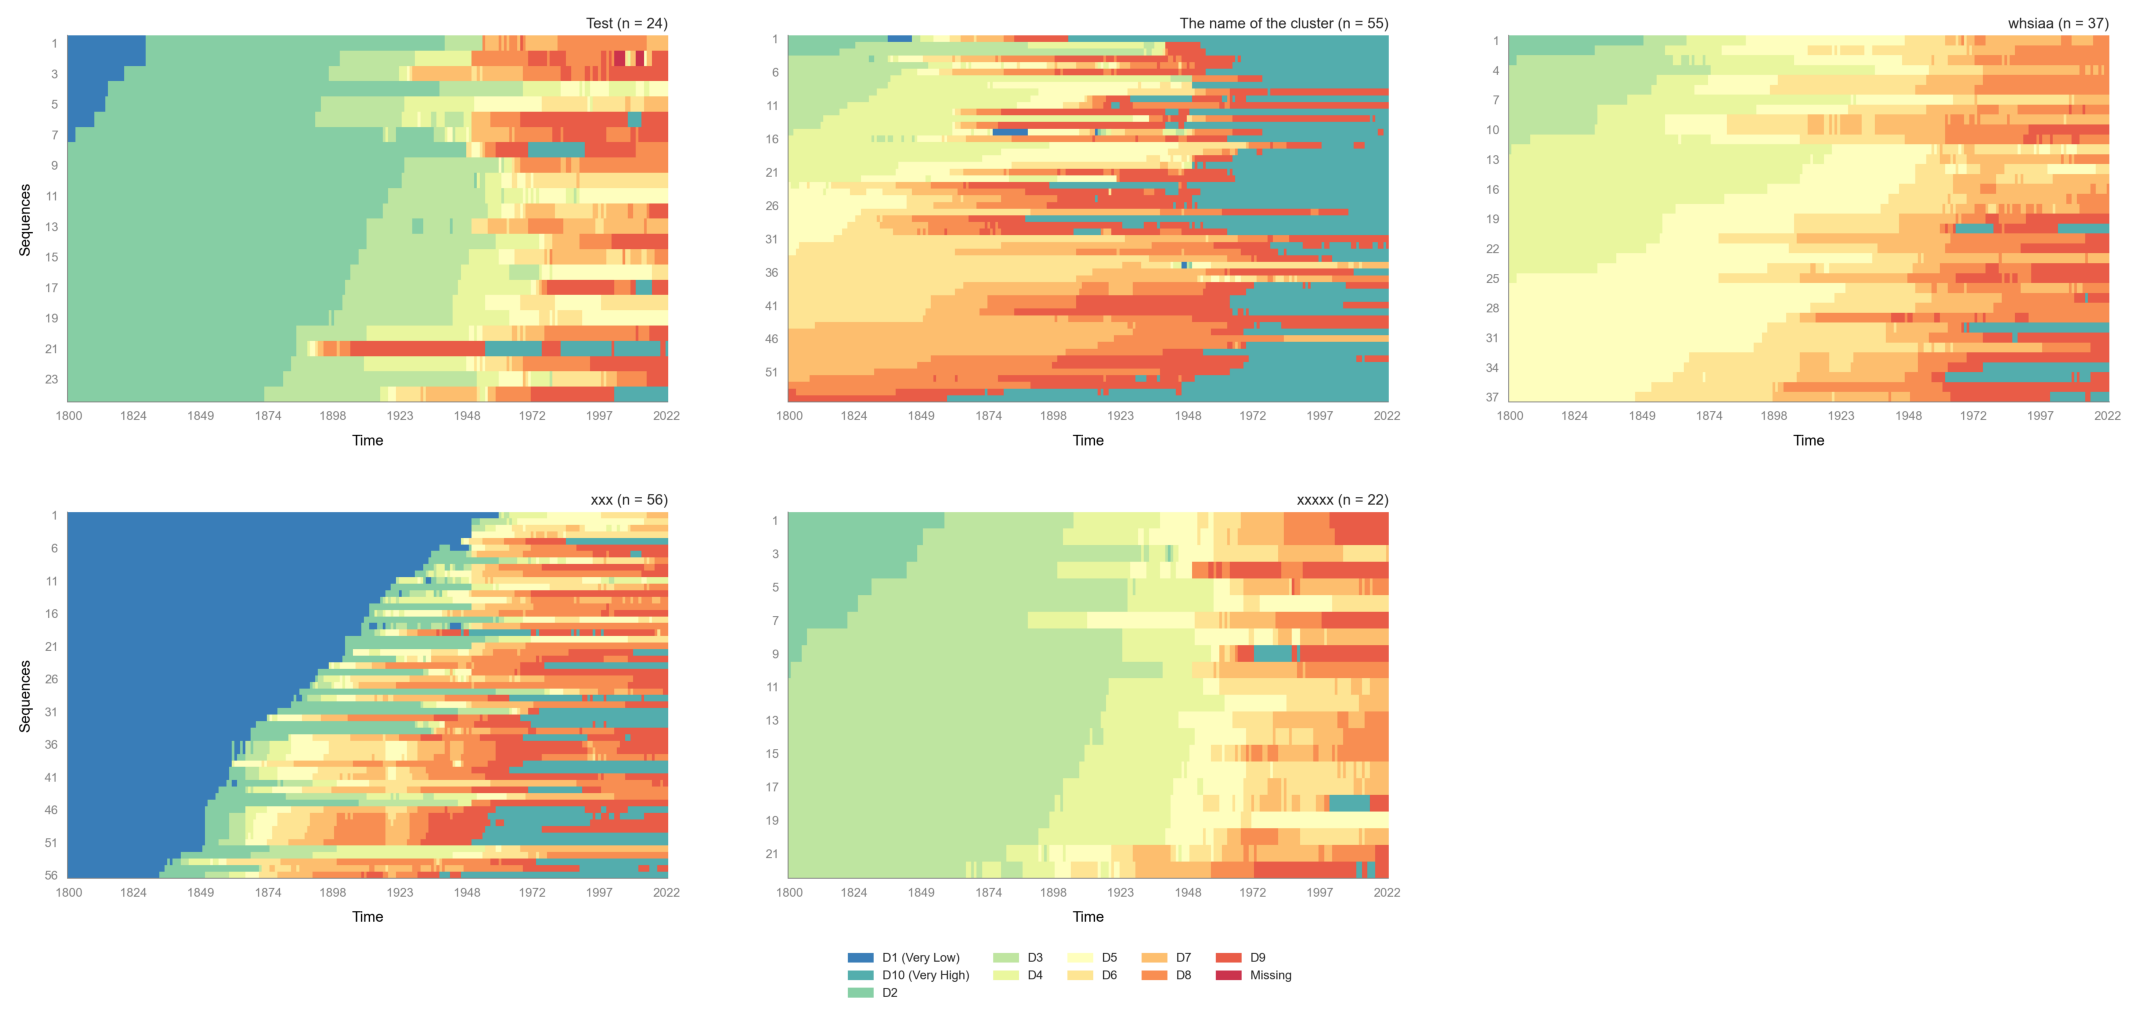

In [20]:
plot_sequence_index(seqdata=sequence_data,
                    id_group_df=membership_table,
                    categories='Cluster',
                    # save_as='cluster_index_plot'
                    )

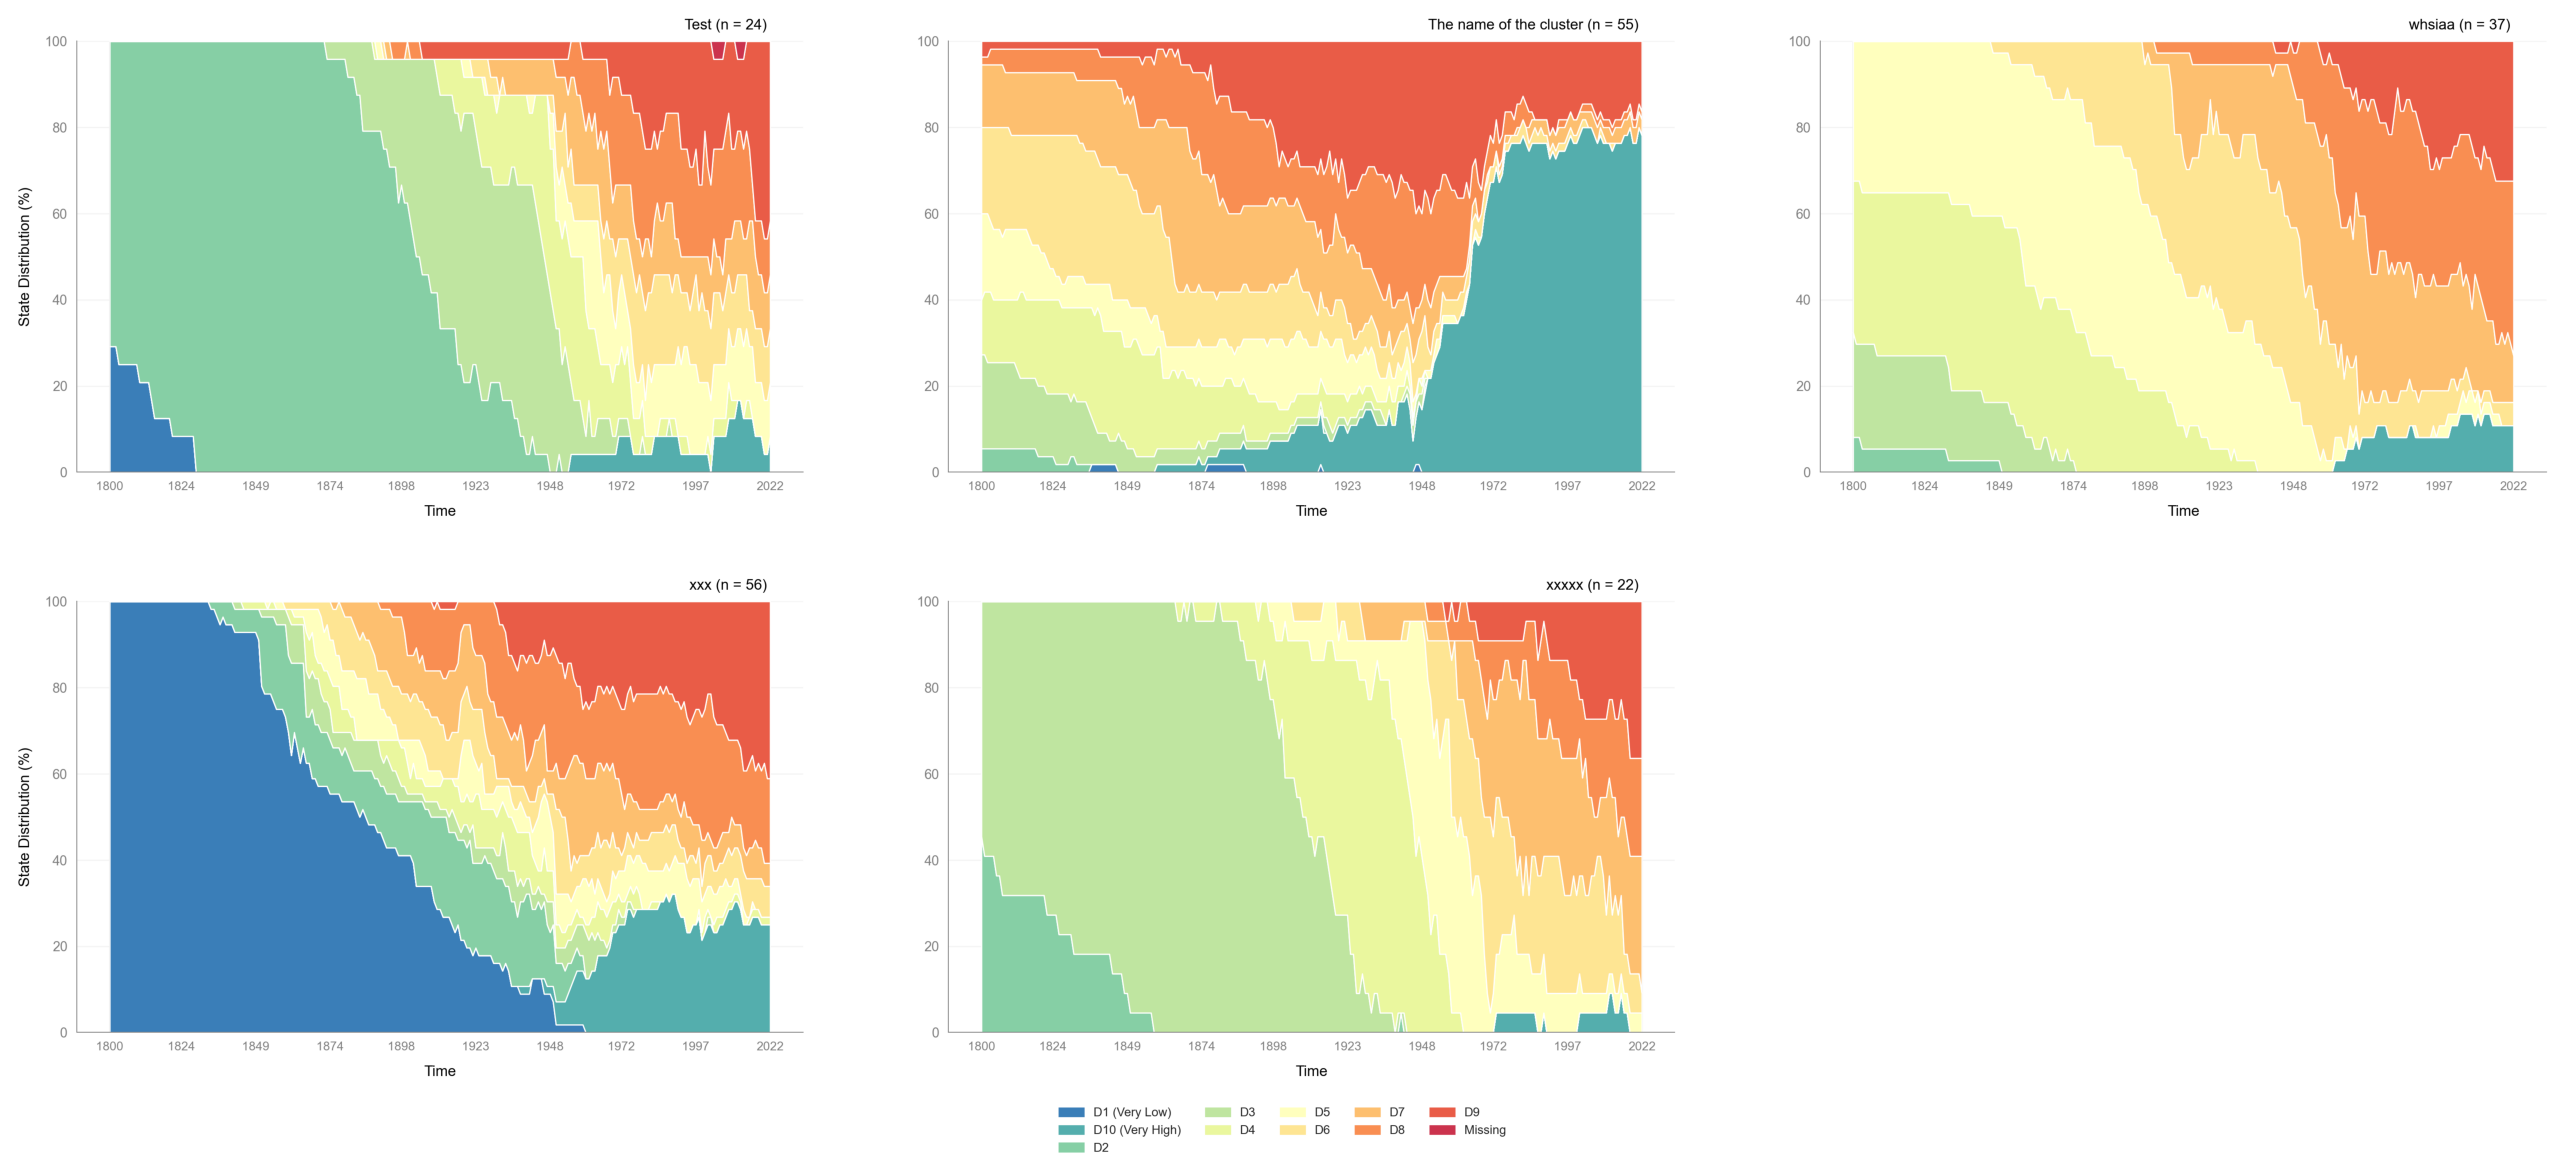

In [21]:
plot_state_distribution(seqdata=sequence_data,
                            id_group_df=membership_table,
                            categories='Cluster',
                            # save_as='cluster_state_distribution_plot'
                        )

## Regression

## Conclusions